In [221]:
# IMPORTAR LIBRERIAS NECESARIAS
import numpy as np  
import matplotlib.pyplot as plt 
import math

In [222]:
# FUNCIÓN PARA ENCONTRAR LA CANTIDAD DE INFECTADOS DADO UN TIEMPO T
def infected(y,I,s):
    z=0.004
    return (math.factorial(int(s)))/((math.factorial(int(s-y))*math.factorial(int(y))))*(1-(1-z)**I)**int(y)*((1-z)**I)**(s-int(y))

In [223]:

def calculoInfectados():
    infectados = []
    s0=400; inf0=3 
    inf=0; r=0; t=0
    while inf+inf0 != 0:
        x=np.linspace(0,s0-r,s0-r+1)
        y=[]
        for i in range(len(x)):
            y.append(infected(x[i],inf0+inf,s0-r))
        inf=int(np.random.choice(x,size=1,p=y)[0])
        r=r+inf
        inf0=0
        t+=1
        infectados.append(tuple([t, inf]))
    return infectados

In [224]:
# GENERAR LOS CICLOS ALEATORIOS
iteraciones = []
for i in range(50):
    iteracion = calculoInfectados()
    iteraciones.append(iteracion)

In [225]:
maxima = 0
for iteracion in iteraciones:
    if len(iteracion) > maxima:
        maxima = len(iteracion)
print("Valor de T máximo encontrado: ", maxima)

Valor de T máximo encontrado:  26


In [226]:
# AGREGAR CEROS A LA DERECHA A LAS ITERACIONES MENORES AL VALOR MÁXIMO ENCONTRADO
for iteracion in iteraciones:
    if len(iteracion) < maxima:
        for i in range(len(iteracion) + 1, maxima + 1):
            iteracion.append(tuple([i, 0]))
print("Ceros agregados correctamente a los valores menores a ", maxima)

Ceros agregados correctamente a los valores menores a  26


In [227]:
# CALCULAR LAS ESPERANZAS PARA CADA VALOR DE TIEMPO T 
# Y GENERAR UNA LISTA DE TIEMPOS DISCRETOS PARA EL EJE X
esperanzas = []
suma = 0
for maxim in range(maxima):
    suma = 0
    for iteracion in iteraciones:
        #print(iteracion[minim])
        suma += iteracion[maxim][1]
    esperanzas.append(suma/len(iteraciones))

# LISTA DE TIEMPOS DISCRETOS
t = [i for i in range(maxima)]
print(esperanzas)
print(t)

[5.58, 8.86, 13.92, 19.92, 25.92, 31.4, 32.38, 30.04, 24.82, 19.8, 15.22, 10.42, 6.58, 4.36, 2.9, 1.92, 1.68, 1.16, 0.84, 0.38, 0.24, 0.12, 0.04, 0.04, 0.04, 0.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


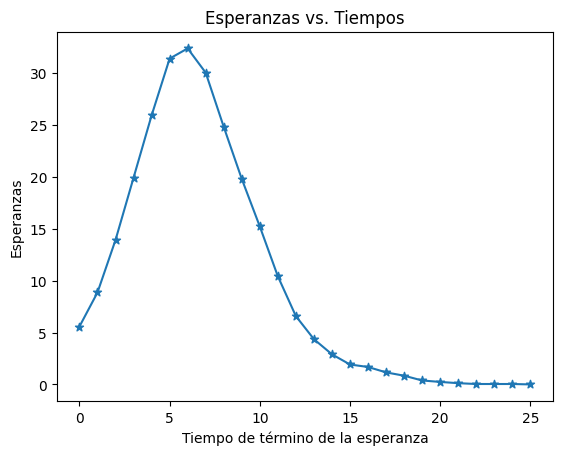

In [228]:
# GRÁFICA
fig=plt.figure()
ax=fig.gca()
x=t
y=esperanzas
plt.title("Esperanzas vs. Tiempos")
ax.set_xlabel("Tiempo de término de la esperanza")
ax.set_ylabel("Esperanzas")
ax.scatter(x,y, marker="*")
ax.plot(x,y)
plt.show()

---

In [229]:
# SE TOMA UN ELEMENTO ALEATORIO DE LAS ITERACIONES OBTENIDAS
indice_random = np.random.choice(len(iteraciones))
iteracin_random = iteraciones[indice_random]

In [230]:
# SE EXTRAEN LOS VALORES DE LOS INFECTADOS EN EL TIEMPO T
xs = [elementoY[1] for elementoY in iteracin_random]
xs

[7,
 6,
 9,
 18,
 22,
 34,
 37,
 33,
 22,
 23,
 20,
 15,
 8,
 7,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

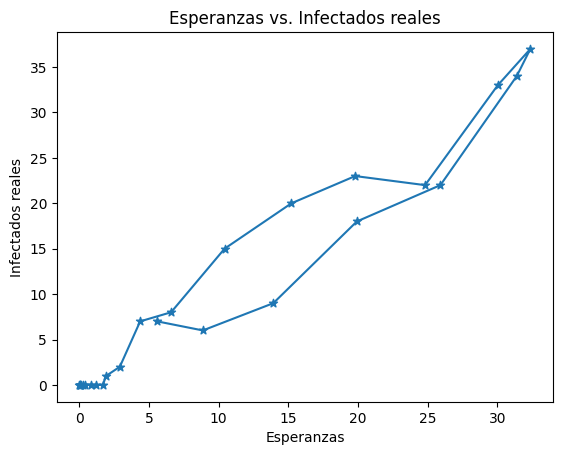

In [231]:
# GRAFICA 
fig=plt.figure()
ax=fig.gca()
x=esperanzas
y=xs
plt.title("Esperanzas vs. Infectados reales")
ax.set_xlabel("Esperanzas")
ax.set_ylabel("Infectados reales")
ax.scatter(x,y, marker="*")
ax.plot(x,y)
plt.show()